In [38]:
import pandas as pd
import numpy as np
from scipy.integrate import cumtrapz
from scipy.signal import detrend
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [39]:

def integrar(path, time1, muestreo):
    output_filename=rf"C:\Users\chelo\Documents\Vibras laboratorio 3\Pos vs tiempo {muestreo} Hz (de muestreo).csv"

    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep=",", names=["tiempo", "aceleracion"],skiprows=1)

    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]


    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + "," + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]



In [40]:
def integrar_forzado(path,forzamiento, time1):
    output_filename=rf"c:\Users\chelo\Documents\Vibras laboratorio 3\Forzado\Pos vs tiempo (forzado) {forzamiento} Hz (de muestreo).csv"
    # Cargar los datos desde el archivo CSV
    data = pd.read_csv(path, sep="\t", names=["tiempo", "aceleracion"],skiprows=1)
    # Filtrar datos hasta el tiempo especificado
    data = data[data["tiempo"] <= time1]

    # Convertir aceleración de g a m/s²
    data["aceleracion"] *= 9.81
    
    # Graficar la aceleración para verificar su forma
    plt.figure()
    plt.plot(data["tiempo"], data["aceleracion"], label="Aceleración (m/s²)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Aceleración (m/s²)")
    #plt.title("Aceleración en función del tiempo")
    plt.legend()
    plt.show()

    # Integrar la aceleración para obtener la velocidad
    velocidad = cumtrapz(data["aceleracion"], data["tiempo"], initial=0)

    # Integrar la velocidad para obtener la posición
    posicion = cumtrapz(velocidad, data["tiempo"], initial=0)
    posicion = detrend(posicion)

    # Ajustar el tamaño del DataFrame para que coincida con las longitudes de 'velocidad' y 'posicion'
    data = data.iloc[:len(velocidad)]

    # Agregar las columnas de velocidad y posición al DataFrame
    data["velocidad"] = velocidad
    data["posicion"] = posicion

    # Crear una nueva columna con "tiempo" y "posicion" combinados, separados por un espacio
    data["tiempo_posicion"] = data["tiempo"].astype(str) + "," + data["posicion"].astype(str)

    # Guardar solo la columna combinada en el archivo CSV especificado
    data[["tiempo_posicion"]].to_csv(output_filename, index=False, header=False)

    # Graficar posición vs tiempo
    plt.figure()
    plt.plot(data["tiempo"], data["posicion"], label="Posición (m)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    #plt.title("Posición vs. Tiempo")
    plt.legend()
    plt.show()

    return data["posicion"]

# Llama a la función con el archivo adecuado, tiempo de corte y nombre de salida

def ajuste_func1(t, A, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A *np.sin(omega * t + phi)
def ajuste_func2(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)



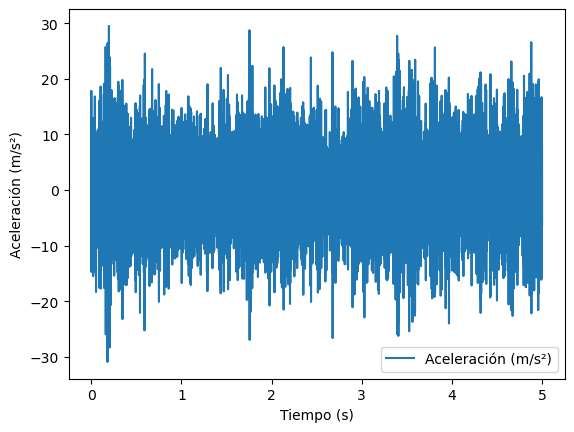

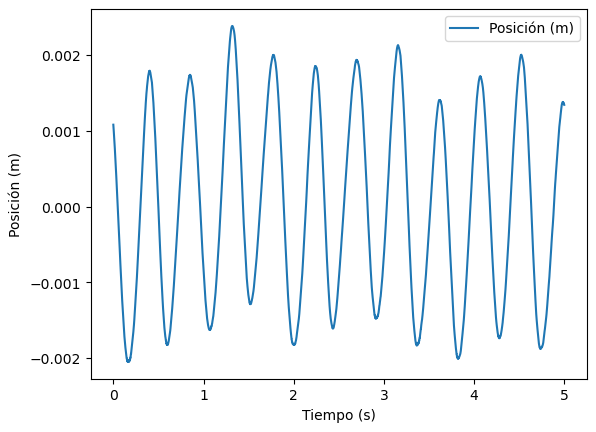

0        0.001079
1        0.001070
2        0.001062
3        0.001054
4        0.001047
           ...   
12795    0.001345
12796    0.001343
12797    0.001342
12798    0.001341
12799    0.001341
Name: posicion, Length: 12800, dtype: float64

In [41]:
integrar(r"C:\Users\chelo\Downloads\Datos_L3 (1)\pt1\DataRecor2.csv",5,10)

In [42]:
import pandas as pd

def inspeccionar_archivo(path):
    # Leer las primeras filas del archivo
    try:
        data = pd.read_csv(path)
        print(data.head())  # Mostrar las primeras filas del archivo
    except Exception as e:
        print("Error al leer el archivo:", e)

# Llamar a la función
inspeccionar_archivo(r"C:\Users\chelo\Documents\Vibras Laboratorio 3\Pos vs tiempo 10 Hz (de muestreo).csv")


             0.0,0.0010792266521643687
0  0.00039062501,0.0010702845144600532
1  0.00078125001,0.0010617478613237385
2    0.001171875,0.0010541044032117007
3      0.0015625,0.0010473567360735486
4    0.001953125,0.0010419474144509472


In [43]:
#Función que utiliza ajustes para la señal de posición vs tiempo. De esta manera se obtiene el parámetro B, delta, xi y por lo tanto w_n=B/xi

def frecuencia_natural(path, time1=10):
    # Cargar los datos y asegurar que se lean como texto
    tabla = pd.read_csv(path, sep=",", header=None, names=["tiempo_posicion"], dtype={"tiempo_posicion": str})
    
    # Separar los valores en las columnas 'tiempo' y 'posición'
    tabla[['tiempo', 'posición']] = tabla['tiempo_posicion'].str.split(',', expand=True).astype(float)

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo = tabla_filtrada["tiempo"].values
    posicion = tabla_filtrada["posición"].values

    # Definir la función de ajuste incluyendo la frecuencia como parámetro
    def ajuste_func(t, A, B, frecuencia, phi):
        omega = 2 * np.pi * frecuencia
        return A * np.exp(-B * t) * np.sin(omega * t + phi)

    # Realizar el ajuste, especificando 4.7 como semilla para la frecuencia
    params, _ = curve_fit(ajuste_func, tiempo, posicion, p0=[1, 0.1, 4.7, 0])

    # Obtener los parámetros ajustados
    A, B, frecuencia, phi = params
    print(f"A = {A}, B = {B}, frecuencia = {frecuencia}, phi = {phi}")

    # Generar la función ajustada en el intervalo de tiempo
    tiempo_ajustado = np.linspace(0, time1, 1000)
    posicion_ajustada = ajuste_func(tiempo_ajustado, A, B, frecuencia, phi)

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    # Calcular delta para cada par de picos consecutivos
    deltas = []
    for i in range(len(valores_picos) - 1):
        delta = np.log(valores_picos[i] / valores_picos[i + 1])
        deltas.append(delta)
        print(f"Delta entre pico {i+1} y pico {i+2}: {delta:.4f}")

    # Calcular el promedio de todos los deltas
    promedio_delta = np.mean(deltas)
    print("Promedio de delta:", promedio_delta)

    # Calcular el coeficiente de amortiguamiento xhi usando el promedio de delta
    xhi = promedio_delta / (np.sqrt(4 * np.pi**2 + promedio_delta**2))
    frecuencia_natural = B / xhi
    print("xhi:", xhi)
    print("frecuencia natural (rad/s):", frecuencia_natural)
    print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()



A = 0.0018102648326629, B = 0.011674075644499989, frecuencia = 2.175447990423797, phi = 2.4883276096982447
Delta entre pico 1 y pico 2: 0.0054
Delta entre pico 2 y pico 3: 0.0055
Delta entre pico 3 y pico 4: 0.0054
Delta entre pico 4 y pico 5: 0.0052
Delta entre pico 5 y pico 6: 0.0053
Delta entre pico 6 y pico 7: 0.0054
Delta entre pico 7 y pico 8: 0.0055
Promedio de delta: 0.005392207935227011
xhi: 0.0008581962310394539
frecuencia natural (rad/s): 13.603037653008867
nu natural (Hz): 2.164990683541536


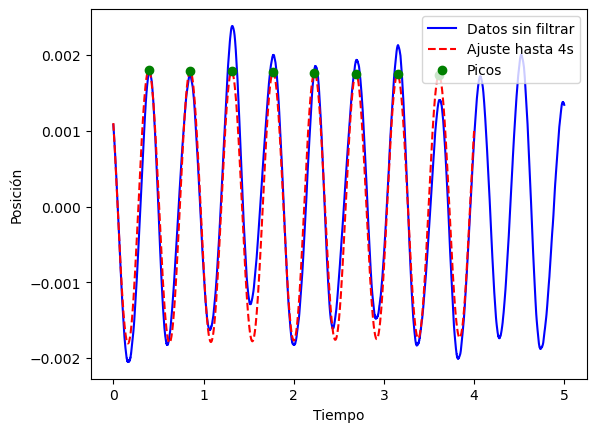

In [44]:
frecuencia_natural(r"C:\Users\chelo\Documents\Vibras Laboratorio 3\Pos vs tiempo 10 Hz (de muestreo).csv",4)

In [45]:
#Función que utiliza ajustes para la señal de posición vs tiempo. De esta manera se obtiene el parámetro B, delta, xi y por lo tanto w_n=B/xi

def frecuencia_natural(path, time1=10):
    # Cargar los datos y asegurar que se lean como texto
    tabla = pd.read_csv(path, sep=",", header=None, names=["tiempo_posicion"], dtype={"tiempo_posicion": str})
    
    # Separar los valores en las columnas 'tiempo' y 'posición'
    tabla[['tiempo', 'posición']] = tabla['tiempo_posicion'].str.split(',', expand=True).astype(float)

    # Filtrar datos hasta el tiempo especificado
    tabla_filtrada = tabla[tabla["tiempo"] <= time1]

    # Datos de tiempo y posición filtrados
    tiempo_ajustado = tabla_filtrada["tiempo"].values
    posicion_ajustada = tabla_filtrada["posición"].values

    # Encontrar todos los picos
    picos, _ = find_peaks(posicion_ajustada)

    # Obtener los tiempos y valores de todos los picos
    tiempos_picos = tiempo_ajustado[picos]
    valores_picos = posicion_ajustada[picos]

    #frecuencia_natural = B / xhi
   # print("xhi:", xhi)
    #print("frecuencia natural (rad/s):", frecuencia_natural)
    #print("nu natural (Hz):", frecuencia_natural / (2 * np.pi))

    # Graficar los datos, el ajuste y los picos
    plt.plot(tabla["tiempo"], tabla["posición"], 'b-', label="Datos sin filtrar")
    plt.plot(tiempo_ajustado, posicion_ajustada, 'r--', label=f"Ajuste hasta {time1}s")
    plt.plot(tiempos_picos, valores_picos, 'go', label="Picos")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.legend()
    plt.show()



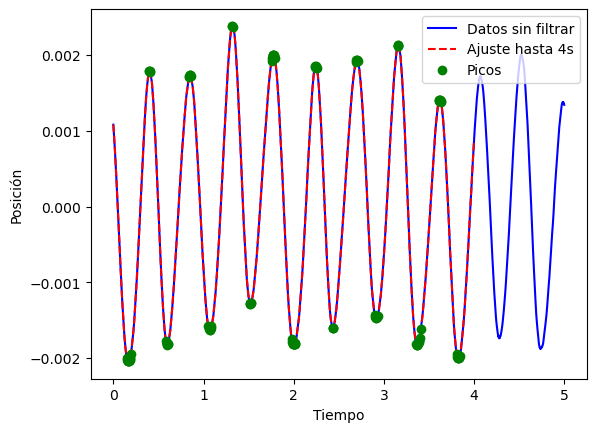

In [46]:
frecuencia_natural(r"C:\Users\chelo\Documents\Vibras Laboratorio 3\Pos vs tiempo 10 Hz (de muestreo).csv",4)